In [1]:
import os
import re
import pickle
import gzip
import pandas as pd
import numpy as np

In [2]:
# path
path_data = 'J:\\Data\\Wi-Fi_processed\\'
path_sign = 'J:\\Data\\sig2d_processed\\'
list_file = os.listdir(path_data)
list_sign = os.listdir(path_sign)

In [3]:
#make sig2d info
wifi_sig = pd.read_csv('J:\\Data\\wifi_sig.csv')
list_sign_id = [r[:8] for r in list_sign]
df_sign  = pd.DataFrame({'id_paper':list_sign_id,'file':list_sign})
info_sig2d = pd.merge(df_sign,wifi_sig,how='left')
info_sig2d.to_csv('info_sig2d.csv')
info_sig2d.head()

,id_paper,file,name,id_sign
0,IMG_0634,IMG_0634_1.png,kristin,105
1,IMG_0634,IMG_0634_10.png,kristin,105
2,IMG_0634,IMG_0634_2.png,kristin,105
3,IMG_0634,IMG_0634_3.png,kristin,105
4,IMG_0634,IMG_0634_4.png,kristin,105


In [4]:
#extract id from subc
df_subc = pd.read_csv('J:\\Data\\df_subc.csv')
df_subc.columns = ['id','len','mean','std']
split_id = df_subc['id'].str.split(pat='_',expand=True)
id_person_num = [int(re.findall('\d+',r)[0]) for r in split_id[0].values]
df_subc['id_person'] = id_person_num
df_subc['id_location'] = split_id[1]
df_subc['id_direction'] = split_id[2]
df_subc['id_exp'] = split_id[3]
df_subc.head()

,id,len,mean,std,id_person,id_location,id_direction,id_exp
0,S001_1_1_1,8454.0,14.734745612960005,10.52119994832711,1,1,1,1
1,S001_1_1_10,11774.0,14.513538604633094,10.477931802216323,1,1,1,10
2,S001_1_1_2,8831.0,14.459016523944035,10.493444603125926,1,1,1,2
3,S001_1_1_3,10690.0,14.62329614942584,10.354664210610299,1,1,1,3
4,S001_1_1_4,12696.0,15.006234766847859,10.254488832117909,1,1,1,4


In [34]:
# select data
# filter outlier
len_min = np.mean(df_subc['len']) - np.std(df_subc['len'])
len_max = np.mean(df_subc['len']) + np.std(df_subc['len'])
df_subc_islen = df_subc[(df_subc.len >= len_min) & (df_subc.len <= len_max)]
df_subc_isimg = df_subc[df_subc['id_person'].isin(info_sig2d.id_sign)]
data_subc = df_subc.loc[set(df_subc_islen.index) & set(df_subc_isimg.index)]
data_subc_sig = pd.merge(data_subc,info_sig2d,how='left',left_on='id_person',right_on='id_sign')
data_subc_sig.to_csv('data_subc_sig.csv',index=None)
data_subc_sig.head()

,id,len,mean,std,id_person,id_location,id_direction,id_exp,id_paper,file,name,id_sign
0,S017_1_2_11,10258.0,22.066244033278466,5.4654408487538895,17,1,2,11,IMG_0721,IMG_0721_10.png,강경휘,17
1,S017_1_2_11,10258.0,22.066244033278466,5.4654408487538895,17,1,2,11,IMG_0721,IMG_0721_2.png,강경휘,17
2,S017_1_2_11,10258.0,22.066244033278466,5.4654408487538895,17,1,2,11,IMG_0721,IMG_0721_3.png,강경휘,17
3,S017_1_2_11,10258.0,22.066244033278466,5.4654408487538895,17,1,2,11,IMG_0721,IMG_0721_4.png,강경휘,17
4,S017_1_2_11,10258.0,22.066244033278466,5.4654408487538895,17,1,2,11,IMG_0721,IMG_0721_5.png,강경휘,17


In [6]:
# load and uncompress.
with gzip.open(path_data+list_file[0],'rb') as f:
    data = pickle.load(f)
data.shape

(8454, 30, 2, 3)

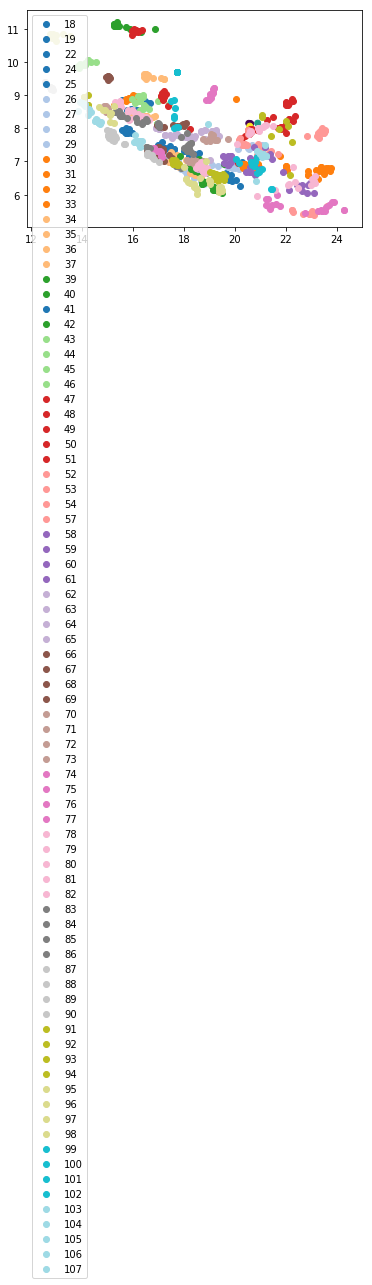

In [33]:
#plotting
from matplotlib.pyplot import cm
data_plot = data_subc[(data_subc.id_location=='1') & (data_subc.id_direction=='1')]
X_plot = data_plot[['mean','std']].values.astype('float')
#categories = yolo_cat.supercategory
categories = data_plot['id_person'].values
cat = set(categories)
target_ids = range(len(cat))

color=cm.tab20(np.linspace(0,1,len(cat)))
from matplotlib import pyplot as plt
plt.figure()
for i, c, label in zip(target_ids, color, cat):
    plt.scatter(X_plot[categories==label, 0], X_plot[categories==label, 1],c=c, label=label)
plt.legend()
plt.show()

In [31]:
target_ids

range(0, 84)